# Credit Card Fraud Detection
It is important for credit card companies and banks to be able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

In this project, we are asked to classify credit card transactions as fraudulent or genuine, learning from a large and highly unbalanced dataset with anonymized transactions made by credit cards in September 2013 by european cardholders.

The original challenge and dataset can be found here: https://www.kaggle.com/mlg-ulb/creditcardfraud

# First glance to our dataset

Let's take a first glance to our dataset, 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

random_seed = 0
np.random.seed(random_seed)

# Load CSV as pandas data frame:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

# Visualize the dataframe structure and data types:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# More details about the dataset

In [2]:
# Get a general description of the dataset:
N = df.shape[0]
print(f"Total number of transactions: {N}")

Nf = sum(df['Class']==1)
print(f"Number of fraud transactions: {Nf} ({Nf/N*100:.2} % of the total)")

print("\n\nFurther information about this dataset:\n")
#df.info() # Here we can see there are no NULL elements, and all data types are float, except for the 'Class' field
print(f"The column with more NULL values has {df.isnull().sum().max()} NULL values.")

df.describe() # Show statistical information: min, max, mean, std, and percentiles of each feature

Total number of transactions: 284807
Number of fraud transactions: 492 (0.17 % of the total)


Further information about this dataset:

The column with more NULL values has 0 NULL values.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Is the amount of money a decisive feature to detect a fraud?

In [3]:
# Get statistical information about the 'Amount' feature for each class:
print("\n\nStatistical description per class:")
print(df.groupby('Class')['Amount'].agg(['min', 'max', 'median', 'mean', 'std']))



Statistical description per class:
       min       max  median        mean         std
Class                                               
0      0.0  25691.16   22.00   88.291022  250.105092
1      0.0   2125.87    9.25  122.211321  256.683288


At first sight, the amount feature does not seem to provide much information regarding the type of transaction. Fraud transactions are characterized by more or less the same distribution of amounts.

# Is the time of the day a decisive feature to detect a fraud?

In [4]:
# Normalize time feature, convert to hours:
df['Time'] = df['Time'].apply(lambda x : x / 3600)
print(round(df['Time'].max()))  # Assuming time is measured in seconds, the dataset span 48 hours of transactions:

# Let's see if fraud transactions are time-related:
print(df.groupby('Class')['Time'].agg(['min', 'max', 'median', 'mean', 'std']))

# Let's map into two 24-hour periods:
df['Time'] = df['Time'].apply(lambda x : x % 24)

# Let's see if fraud transactions are time-related:
print(df.groupby('Class')['Time'].agg(['min', 'max', 'median', 'mean', 'std']))

48
            min        max     median       mean        std
Class                                                      
0      0.000000  47.997778  23.530833  26.343945  13.190004
1      0.112778  47.318889  20.991250  22.429669  13.287601
            min        max     median       mean       std
Class                                                     
0      0.000000  23.999444  15.014167  14.542106  5.844597
1      0.112778  23.993333  12.052361  12.136986  6.719614


It seems that non-fraud and fraud transactions may occur in any moment of the day.

# Tackle unbalanced classes

In [5]:
X_non_fraud_balanced = df[df['Class'] == 0].sample(Nf)  # Get a random sample of non-fraud transactions (balanced 50%-50%)
X_fraud_balanced = df[df['Class'] == 1]

df_balanced = X_non_fraud_balanced.append(X_fraud_balanced).sample(frac=1).reset_index(drop=True) # Shuffle
X_balanced = df_balanced.drop(['Class'], axis = 1).values
y_balanced = df_balanced["Class"].values

# Normalization:
from sklearn import preprocessing
X_balanced = preprocessing.MaxAbsScaler().fit_transform(X_balanced)

# Visualize in two dimensions to get a first glance of the classification problem. 
## Dimensionality reduction: t-SNE and PCA

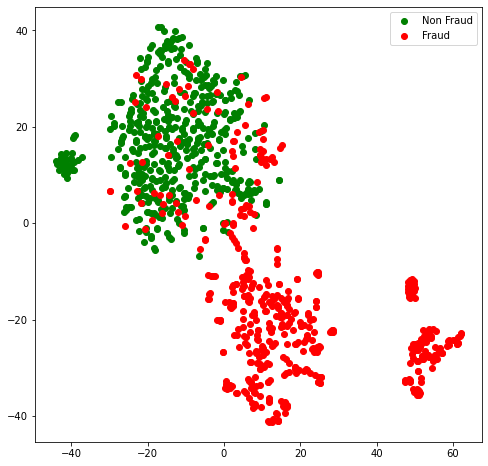

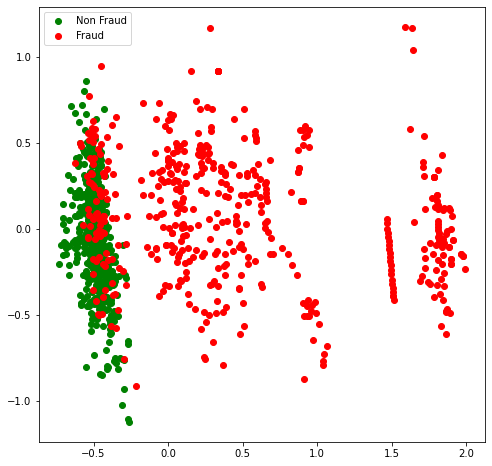

In [6]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def tsne_plot(x, y):
    # Visualize high-dimensional data. It converts similarities between data points to joint probabilities 
    # and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional 
    # embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different 
    # initializations we can get different results. (https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
    # t-distributed Stochastic Neighbor Embedding (no need for dimensionality reduction, since the number of features is less than 50)
    tsne = TSNE(n_components=2, random_state=random_seed) 
    
    X_tsne = tsne.fit_transform(x)

    plt.figure(figsize=(8, 8))
    plt.scatter(X_tsne[np.where(y == 0), 0], X_tsne[np.where(y == 0), 1], color='g', label='Non Fraud')
    plt.scatter(X_tsne[np.where(y == 1), 0], X_tsne[np.where(y == 1), 1], color='r', label='Fraud')

    plt.legend(loc='best')
    plt.show()
    
def pca_plot(x, y):
    # Principal component analysis (PCA).
    # Linear dimensionality reduction using Singular Value Decomposition of the data to project it 
    # to a lower dimensional space. The input data is centered but not scaled for each feature before applying 
    # the SVD. (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
    pca = PCA(n_components=2, random_state=random_seed)
    X_pca = pca.fit_transform(x)
    
    plt.figure(figsize=(8, 8))
    plt.scatter(X_pca[np.where(y == 0), 0], X_pca[np.where(y == 0), 1], color='g', label='Non Fraud')
    plt.scatter(X_pca[np.where(y == 1), 0], X_pca[np.where(y == 1), 1], color='r', label='Fraud')

    plt.legend(loc='best')
    plt.show()
    
tsne_plot(X_balanced, y_balanced)
pca_plot(X_balanced, y_balanced)
# In these scatter plots, we see that about a half of the frauds are quite different from normal transactios,
# while the other half is more difficult to distinguish

# Baseline classifier: logistic regression

After dimensionality reduction, it seems that most of the fraud transactions can be easily separated from non-fraud transactions using a straight line. Let's consider a simple model as baseline: logistic regression.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, accuracy_score


X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=random_seed)

log_reg_model = LogisticRegression(solver="lbfgs", max_iter=1000)
log_reg_model.fit(X_train_b, y_train_b)

y_pred_b = log_reg_model.predict(X_test_b)

print ("")
print ("Classification Report: ")
print (classification_report(y_test_b, y_pred_b))

print ("")
print (f"Accuracy Score: {accuracy_score(y_test_b, y_pred_b)*100:.3} %")


Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.99      0.94        93
           1       0.99      0.89      0.94       104

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197


Accuracy Score: 93.9 %


Awesome! Just as expected, the accuracy in the validation set is very high, above 90 %.
That is a great start. Now, let's try to improve that result. 

## Feature importance
There are 30 features in this dataset, probably some of them are just noise. Let's estimate the importance of each one, and select just the features that explain most of the classification.

In [8]:
from sklearn.inspection import permutation_importance

total_importance = 90.0

r = permutation_importance(log_reg_model, X_balanced, y_balanced, n_repeats=30, random_state=random_seed)

imp_sum = 0
print('Feature importance:')
most_important_features = []
for i in r.importances_mean.argsort()[::-1]:
    imp_sum += r.importances_mean[i]
    print(f"{df.columns[i]:<10}", f"{r.importances_mean[i]*100:.1f}", f" +/- {r.importances_std[i]*100:.1f} %")
    if (imp_sum <= total_importance/100) and (r.importances_mean[i]-r.importances_std[i]) > 0:
        most_important_features.append(df.columns[i])
        
print(f"\nThe most important features in this dataset are: \n{most_important_features}")

Feature importance:
V14        9.6  +/- 0.9 %
V4         8.1  +/- 1.0 %
V12        2.7  +/- 0.7 %
V11        1.1  +/- 0.5 %
V10        0.4  +/- 0.4 %
V6         0.4  +/- 0.2 %
V13        0.4  +/- 0.2 %
V16        0.2  +/- 0.4 %
V1         0.2  +/- 0.2 %
V8         0.2  +/- 0.1 %
V22        0.2  +/- 0.1 %
V27        0.1  +/- 0.1 %
V18        0.1  +/- 0.1 %
V3         0.1  +/- 0.3 %
Time       0.1  +/- 0.1 %
V17        0.1  +/- 0.2 %
V25        0.1  +/- 0.1 %
V15        0.0  +/- 0.1 %
V7         0.0  +/- 0.1 %
V19        0.0  +/- 0.1 %
V28        0.0  +/- 0.1 %
V21        0.0  +/- 0.0 %
Amount     0.0  +/- 0.1 %
V23        -0.0  +/- 0.0 %
V5         -0.0  +/- 0.0 %
V24        -0.0  +/- 0.1 %
V9         -0.0  +/- 0.2 %
V26        -0.0  +/- 0.1 %
V2         -0.0  +/- 0.1 %
V20        -0.1  +/- 0.0 %

The most important features in this dataset are: 
['V14', 'V4', 'V12', 'V11', 'V10', 'V6', 'V13', 'V8', 'V22', 'V27', 'V18', 'Time']


In [9]:
# Let's keep only the most important features:
most_important_features_plus_class = most_important_features[:]
most_important_features_plus_class.append('Class')
df_balanced_important = df_balanced[most_important_features_plus_class]

X_balanced_important = df_balanced_important.drop(['Class'], axis = 1).values
y_balanced_important = df_balanced_important["Class"].values

## Decision tree classifier
Let's try a non-linear model for our dataset using only the most important features.

In [10]:
from sklearn.tree import DecisionTreeClassifier


X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_balanced_important, y_balanced_important, test_size=0.2, random_state=random_seed)

dec_tree_model = DecisionTreeClassifier()
dec_tree_model.fit(X_train_b, y_train_b)

y_pred_b = dec_tree_model.predict(X_test_b)

print ("")
print ("Classification Report: ")
print (classification_report(y_test_b, y_pred_b))

print ("")
print (f"Accuracy Score: {accuracy_score(y_test_b, y_pred_b)*100:.3} %")


Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        93
           1       0.95      0.96      0.96       104

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197


Accuracy Score: 95.4 %


After removing noise features, we have a better accuracy, above 95 %.

# Extract low-level features: autoencoder
An autoencoder is neural network that we train to perform regression on the input data by extracting low-level features. This helps to better characterize our classes.

In [11]:
from sklearn import preprocessing

# Get the most important features from all dataset, normalize them:
X_all = df.drop(["Class"], axis=1)
X_all_imp = X_all[most_important_features]
y_all_imp = df["Class"].values

X_all_imp_scale = preprocessing.MaxAbsScaler().fit_transform(X_all_imp.values)
X_all_normal_imp_scale = X_all_imp_scale[y_all_imp == 0]
X_all_fraud_imp_scale = X_all_imp_scale[y_all_imp == 1]

In [12]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

## Define model architecture:
# input layer 
input_layer = Input(shape=(X_all_imp_scale.shape[1],))

# encoding layers
encoded = Dense(50, activation='sigmoid', activity_regularizer=regularizers.l2(10e-5))(input_layer)
encoded = Dense(20, activation='relu')(encoded)

# decoding layers
decoded = Dense(20, activation='sigmoid')(encoded)
decoded = Dense(50, activation='sigmoid')(decoded)

# output layer
output_layer = Dense(X_all_imp_scale.shape[1], activation='relu')(decoded)

## Compile model:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse")

## Fit model:
autoencoder.fit(X_all_normal_imp_scale, X_all_normal_imp_scale, 
                batch_size = 256, epochs = 10, 
                shuffle = True, validation_split = 0.20);

Epoch 1/10
889/889 [==============================] - 3s 3ms/step - loss: 0.2555 - val_loss: 0.2379
Epoch 2/10
889/889 [==============================] - 2s 3ms/step - loss: 0.2084 - val_loss: 0.1884
Epoch 3/10
889/889 [==============================] - 2s 3ms/step - loss: 0.1604 - val_loss: 0.1421
Epoch 4/10
889/889 [==============================] - 3s 3ms/step - loss: 0.1177 - val_loss: 0.1028
Epoch 5/10
889/889 [==============================] - 2s 3ms/step - loss: 0.0831 - val_loss: 0.0719
Epoch 6/10
889/889 [==============================] - 3s 3ms/step - loss: 0.0569 - val_loss: 0.0493
Epoch 7/10
889/889 [==============================] - 2s 3ms/step - loss: 0.0385 - val_loss: 0.0340
Epoch 8/10
889/889 [==============================] - 2s 3ms/step - loss: 0.0264 - val_loss: 0.0242
Epoch 9/10
889/889 [==============================] - 2s 3ms/step - loss: 0.0189 - val_loss: 0.0183
Epoch 10/10
889/889 [==============================] - 3s 3ms/step - loss: 0.0146 - val_loss: 0.0150

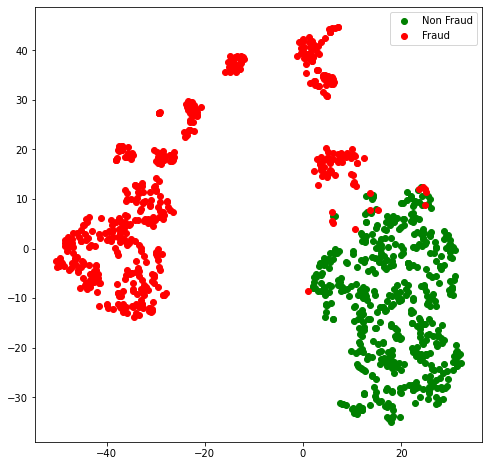

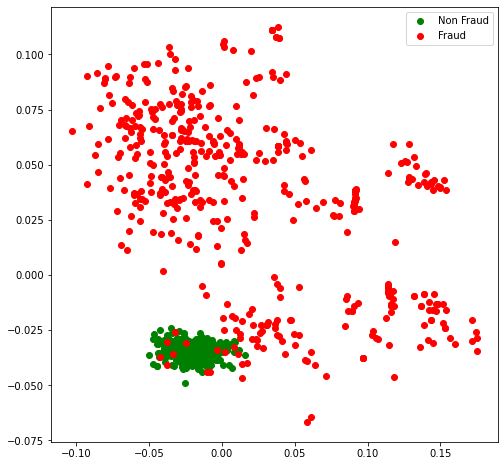

In [13]:
from keras.models import Sequential

# Actual classifier, using the first layers (encoders) of the pretrained model:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

norm_hid_rep = hidden_representation.predict(X_all_normal_imp_scale[:Nf]) # Balanced dataset
fraud_hid_rep = hidden_representation.predict(X_all_fraud_imp_scale)

rep_X = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_normal = np.zeros(norm_hid_rep.shape[0])
y_fraud = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_normal, y_fraud)

tsne_plot(rep_X, rep_y)
pca_plot(rep_X, rep_y)

Look how well separated are our classes. We expect a higher accuracy using the Decision Tree model of the previous section.

In [24]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(rep_X, rep_y, test_size=0.2, random_state=random_seed)
dec_tree_model1 = DecisionTreeClassifier()
dec_tree_model1.fit(X_train, y_train)
y_pred = dec_tree_model1.predict(X_test)

print ("")
print ("Classification Report: ")
print (classification_report(y_test, y_pred))

print ("")
print (f"Accuracy Score: {accuracy_score(y_test, y_pred)*100:.3} %")


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97        91
         1.0       0.98      0.97      0.98       106

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197


Accuracy Score: 97.5 %


Excellent! In the validation set, we reach about 97.5 %.

## Area Under the Precision-Recall Curve
Finally, let's analyze the Precision-Recall Curve and measure the Area Under the Precision-Recall Curve, as recommended by the author of this challenge.

Average precision-recall score: 96.8 %
Area Under the Precision-Recall Curve = 98.4 %


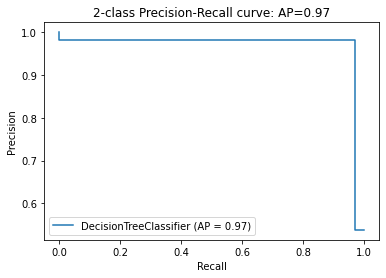

In [16]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc


average_precision = average_precision_score(y_test, y_pred)

print(f'Average precision-recall score: {average_precision*100:0.3} %')

disp = plot_precision_recall_curve(dec_tree_model1, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
area = auc(recall, precision)
print(f"Area Under the Precision-Recall Curve = {area*100:.3} %")